This is the ipynb notebook to perform PDA on the real dae datasetr

In [10]:
import os
import random
import matplotlib.pyplot as plt
import re

In [41]:
# Plot a random input and ground truth pair from the dataset
def plot_pair():
    # Get all images from all directories under data/RealDAE directory
    files = []
    for root, dirs, filenames in os.walk('../data/RealDAE'):
        for filename in filenames:
            files.append(os.path.join(root, filename))
    
    # Filter out the inputs
    inputs = [f for f in files if re.search(r'.*in.jpg', f)]
    
    # Get a random input
    in_img = random.choice(inputs)
    gt_img = in_img.replace('in.jpg', 'gt.jpg')

    # Plot the pair
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(plt.imread(in_img))
    axs[0].set_title('Input')
    axs[1].imshow(plt.imread(gt_img))
    axs[1].set_title('Ground Truth')
    axs[1].axis('off')
    plt.show()

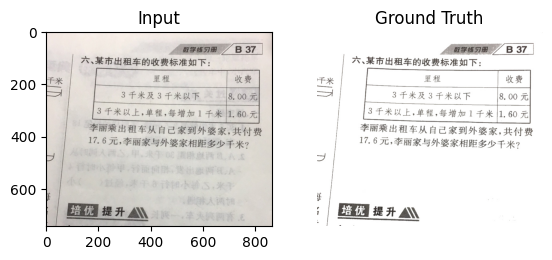

In [56]:
plot_pair()

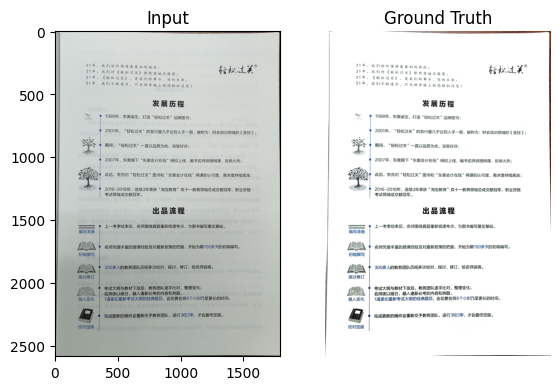

In [43]:
plot_pair()

The images have varying width and height. Since the task RealDAE used for is Image enhancement, our model will need to be able to handle varying sizes so UNet family will be used

In [44]:
# Print the total number of images
files = []
for root, dirs, filenames in os.walk('../data/RealDAE'):
    for filename in filenames:
        files.append(os.path.join(root, filename))
print('Total number of images:', len(files))

Total number of images: 1200


In [49]:
# Filter the number of train images (files with train in it)
train_files = [f for f in files if re.search(r'.*train.*', f)]
print('Number of train images:', len(train_files))

Number of train images: 900


In [50]:
# Filter out the number of test images (files with test in it)
test_files = [f for f in files if re.search(r'.*test.*', f)]
print('Number of test images:', len(test_files))

Number of test images: 300


In [51]:
# Check if there is any overlap between train and test images
overlap = set(train_files).intersection(set(test_files))
print('Number of overlapping images:', len(overlap))

Number of overlapping images: 0


In [52]:
# Check if there is any duplicates 
print('Number of duplicates:', len(files) - len(set(files)))

Number of duplicates: 0
